In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

In [3]:
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

### 서울시 식당종류별 점포수와 전국 점포수

#### 점포수 데이터 불러오기

In [37]:
seoul=pd.read_csv('./Data/6110000_서울특별시_07_24_04_P_일반음식점.csv',encoding='cp949')

In [40]:
seoul_ing=seoul[seoul['영업상태명'] == '영업/정상']

In [43]:
seoul_ing['업태구분명'].unique()

array(['한식', '일식', '기타', '출장조리', '분식', '식육(숯불구이)', '중국식', '경양식', '호프/통닭',
       '까페', '정종/대포집/소주방', '뷔페식', '김밥(도시락)', '통닭(치킨)', '횟집', '패밀리레스트랑',
       '감성주점', '외국음식전문점(인도,태국등)', '라이브카페', '복어취급', '키즈카페', '냉면집', '패스트푸드',
       '탕류(보신용)', '커피숍', nan, '전통찻집', '이동조리'], dtype=object)

In [46]:
seoul_num=pd.pivot_table(seoul_ing,index='업태구분명',aggfunc='size')

In [50]:
total=pd.read_csv('./Data/fulldata_07_24_04_P_일반음식점.csv',encoding='cp949')

In [51]:
total_ing=total[total['영업상태명'] == '영업/정상']

In [52]:
total_ing['업태구분명'].unique()

array(['한식', '호프/통닭', '기타', '경양식', '분식', '일식', '정종/대포집/소주방', '중국식',
       '식육(숯불구이)', '외국음식전문점(인도,태국등)', '횟집', '라이브카페', '냉면집', '뷔페식',
       '김밥(도시락)', '탕류(보신용)', '패밀리레스트랑', '감성주점', '까페', '출장조리', '패스트푸드',
       '키즈카페', '통닭(치킨)', '복어취급', nan, '전통찻집', '이동조리', '커피숍'], dtype=object)

In [53]:
total_num=pd.pivot_table(total_ing,index='업태구분명',aggfunc='size')

#### 데이터 합치기
- 분식 , 양식 , 일식, 제과, 중식, 치킨, 커피, 패스트푸드 , 한식, 호프 , 기타

In [79]:
total_num=pd.DataFrame(total_num)
seoul_num=pd.DataFrame(seoul_num)


In [83]:
category=['한식','분식','일식','중국식','패스트푸드','까페','호프/통닭','통닭(치킨)','경양식']
total_10=total_num[total_num.index.isin(category)]
total_else=total_num[~total_num.index.isin(category)]
seoul_10=seoul_num[seoul_num.index.isin(category)]
seoul_else=seoul_num[~seoul_num.index.isin(category)]

In [91]:
total_10.sort_values(by=0,ascending=False,inplace=True)
seoul_10.sort_values(by=0,ascending=False,inplace=True)

In [92]:
total_num=pd.concat([total_10,total_else.sum(axis=0)])
seoul_num=pd.concat([seoul_10,seoul_else.sum(axis=0)])

In [101]:
seoul_num.rename(index={0 :'기타'},columns={0:'합계'},inplace=True)
total_num.rename(index={0 :'기타'},columns={0:'합계'},inplace=True)

In [107]:
len(seoul_num)

10

#### 시각화 하기

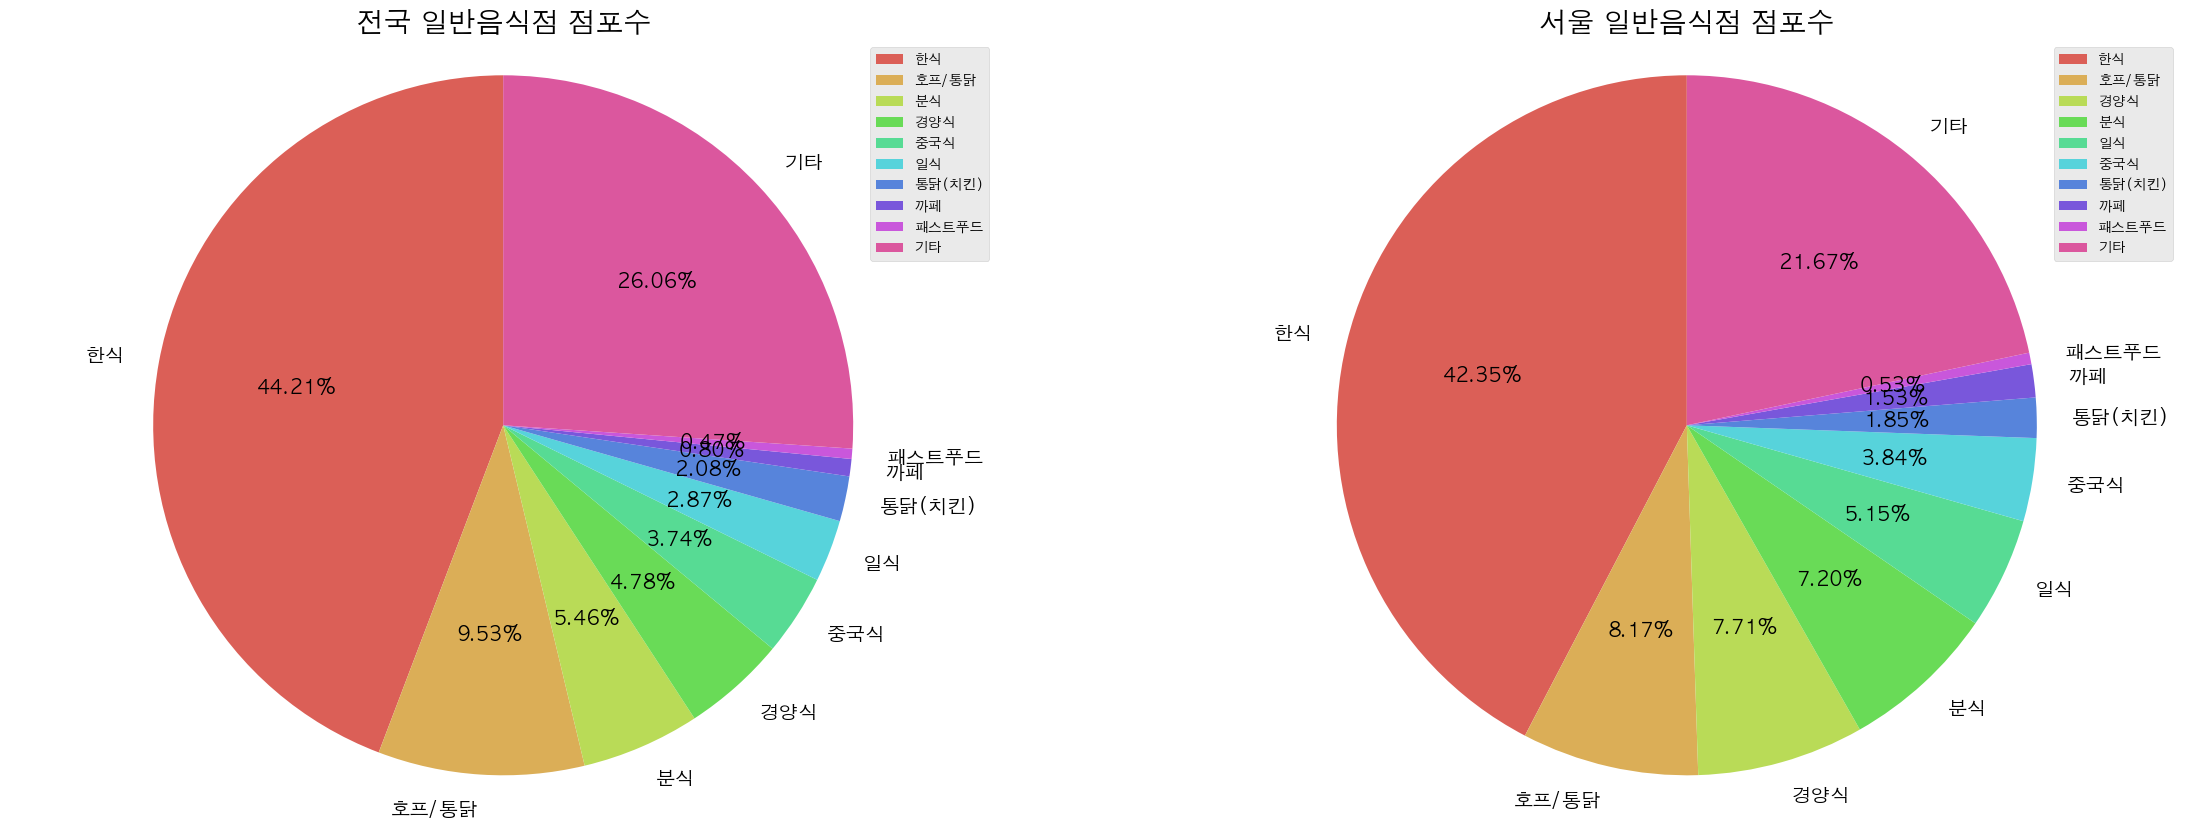

In [135]:
plt.style.use('ggplot')

colors = sns.color_palette('hls',10)

fig , axs = plt.subplots(1 ,2,figsize=(28,10))

total_num['합계'].plot(
    kind='pie',
    autopct='%.2f%%',
    textprops={'fontsize': 14}, 
    startangle=90,
    colors=colors, 
    ax=axs[0]
)

seoul_num['합계'].plot(
    kind='pie',
    autopct='%.2f%%',
    textprops={'fontsize': 14},
    startangle=90,
    colors=colors, 
    ax=axs[1]
)

axs[0].axis('equal') 
axs[1].axis('equal') 

axs[0].set_title('전국 일반음식점 점포수',size=20)
axs[1].set_title('서울 일반음식점 점포수',size=20)

axs[0].legend(loc='best')
axs[1].legend()

axs[0].set_ylabel('')
axs[1].set_ylabel('')

plt.savefig('./Plot/음식점 비율 전국-서울.jpg')

plt.show()

> ### 분류한 것 별로 점포수가 비슷한 것을 볼 수 있다. 
> ### 그러므로 서울시의 음식점 데이터가 전국 음식점의 표본이 될 수 있다고 판단했다.